In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [3]:


!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.2/70.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 34.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.4 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.9.0.80
    Uninstalling opencv-python-headless-4.9.0.80:
      Successfully uninstalled opencv-python-headless-4.9.0.80
  Attempting uninstall: idna
    Found existing installation: idna 3.6
    Uninstalling idna-3.6:
      Successfully uninstalled idna-3.6
  Attempting uninstall: cycler
    Found existing installation: cycler 0.12.1
    Uninstalling cycler-0.12.1:
      Successfully uninstalled cycler-0.12

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="9iUmbT22OdRqYTncBwSN")
project = rf.workspace("last-project").project("wheat-dqlhy")
version = project.version(2)
dataset = version.download("yolov8")



/kaggle/working/datasets
loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Wheat-2 in yolov8:: 100%|██████████| 16433/16433 [00:02<00:00, 5921.28it/s]


In [7]:
%cd {HOME}

!yolo task=segment mode=train model=yolov8s-seg.pt data={dataset.location}/data.yaml epochs=20 imgsz=350

/kaggle/working
100%|███████████████████████████████████████| 22.8M/22.8M [00:00<00:00, 204MB/s]
Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=/kaggle/working/datasets/Wheat-2/data.yaml, epochs=20, patience=50, batch=16, imgsz=350, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False

In [9]:
!ls {HOME}/runs/segment/train/

BoxF1_curve.png					   train_batch0.jpg
BoxPR_curve.png					   train_batch1.jpg
BoxP_curve.png					   train_batch2.jpg
BoxR_curve.png					   train_batch4500.jpg
MaskF1_curve.png				   train_batch4501.jpg
MaskPR_curve.png				   train_batch4502.jpg
MaskP_curve.png					   val_batch0_labels.jpg
MaskR_curve.png					   val_batch0_pred.jpg
args.yaml					   val_batch1_labels.jpg
confusion_matrix.png				   val_batch1_pred.jpg
events.out.tfevents.1709414949.7dfd280b5989.128.0  val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights


/kaggle/working


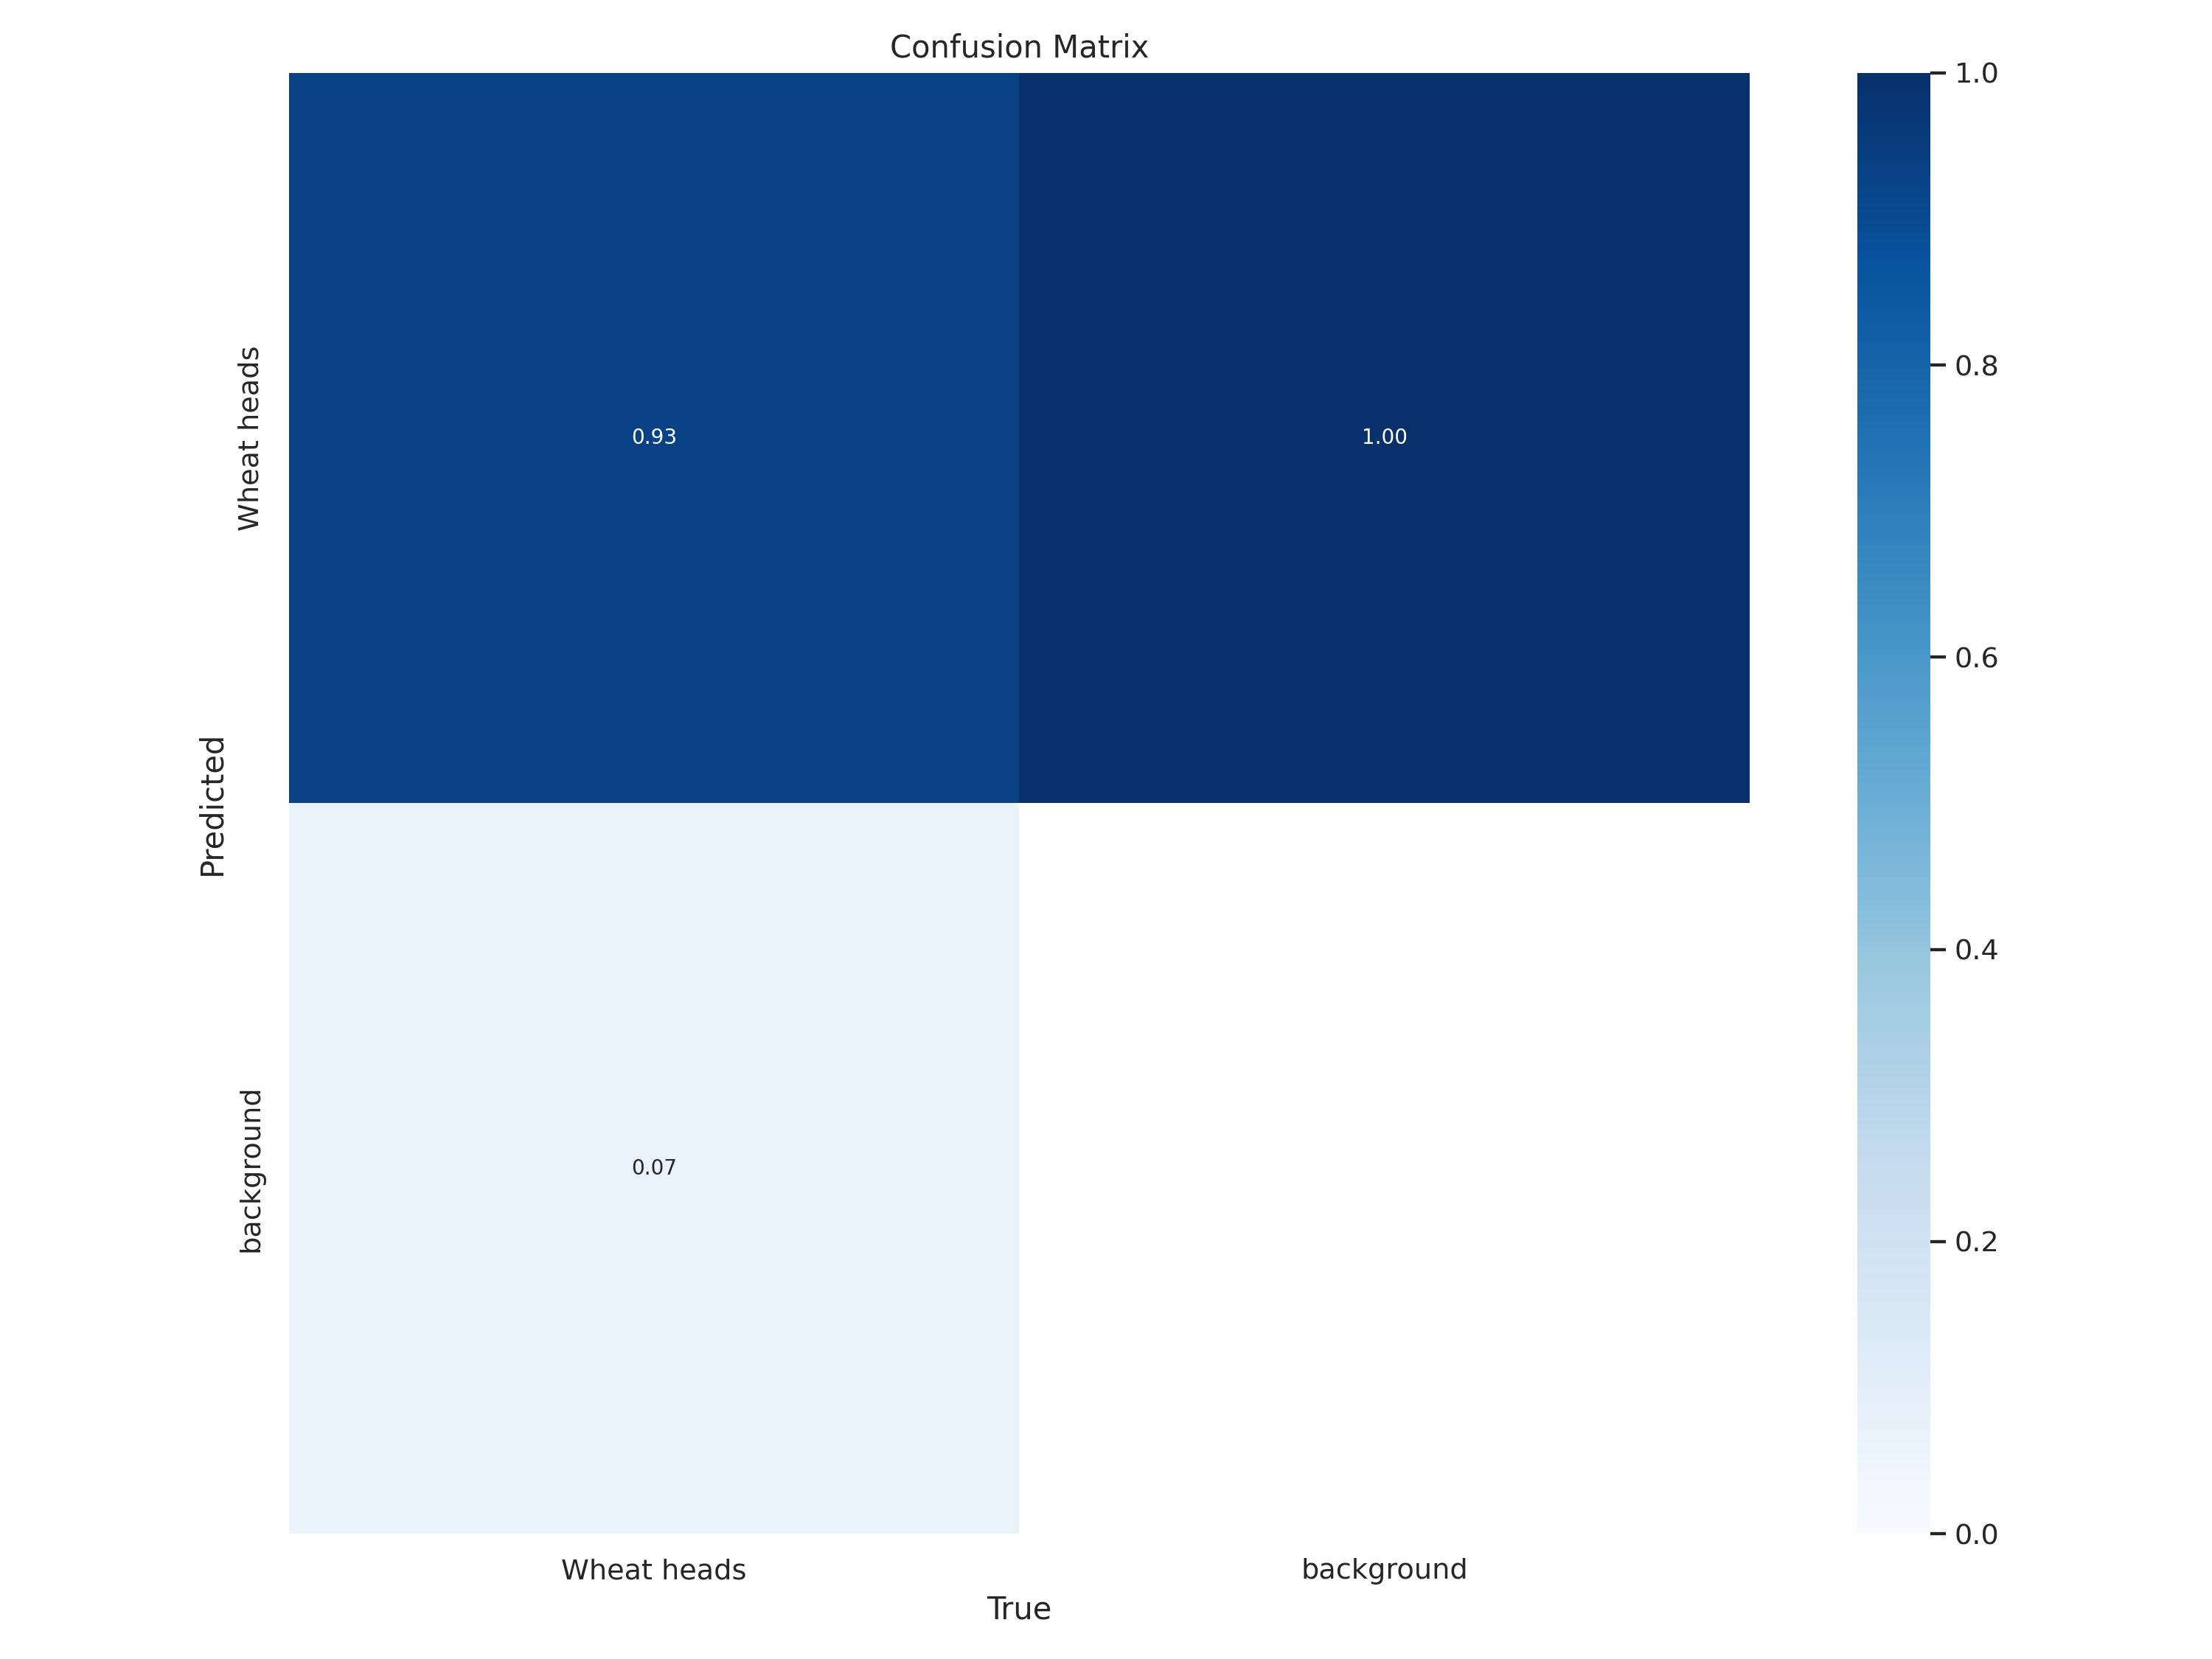

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/confusion_matrix.png', width=700)

/kaggle/working


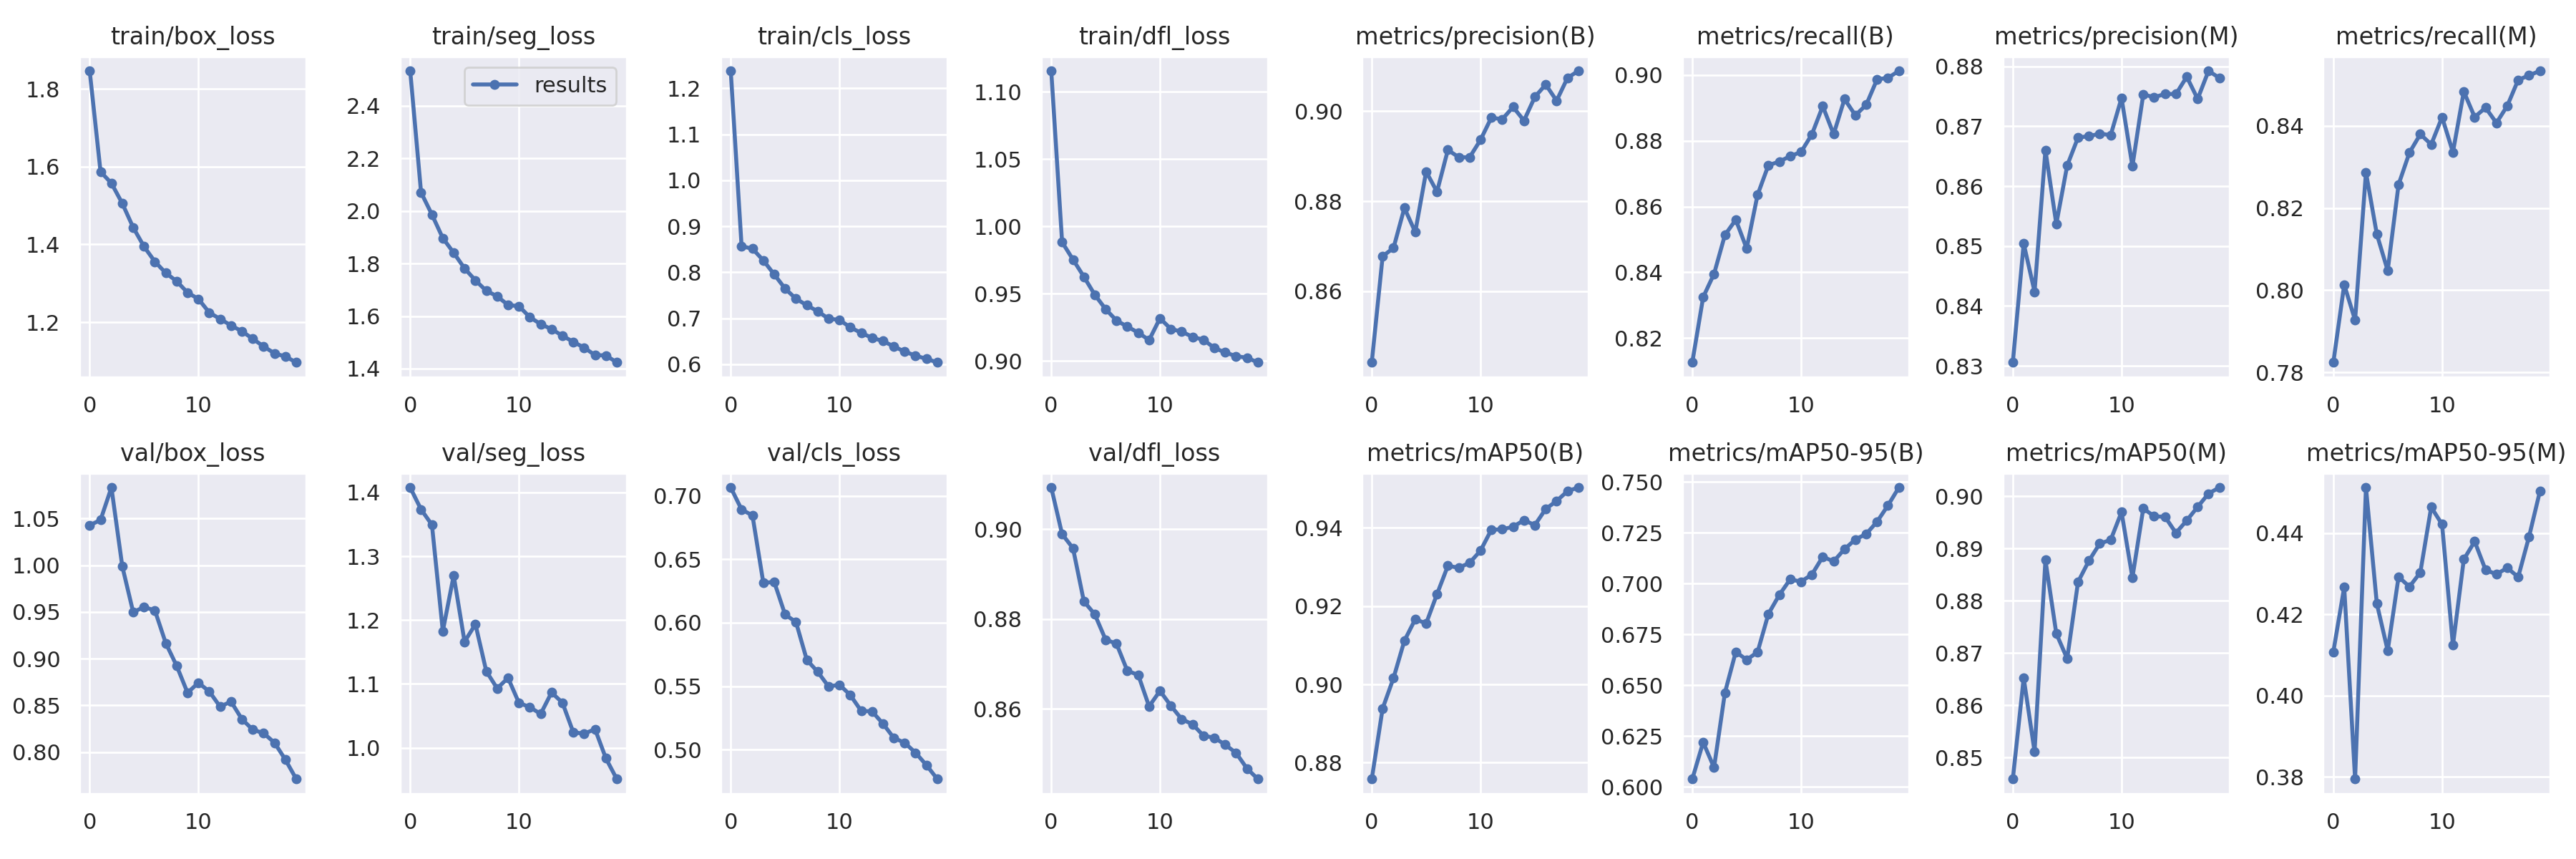

In [14]:
%cd {HOME}

Image(filename=f'{HOME}/runs/segment/train/results.png', width=600)

/kaggle/working


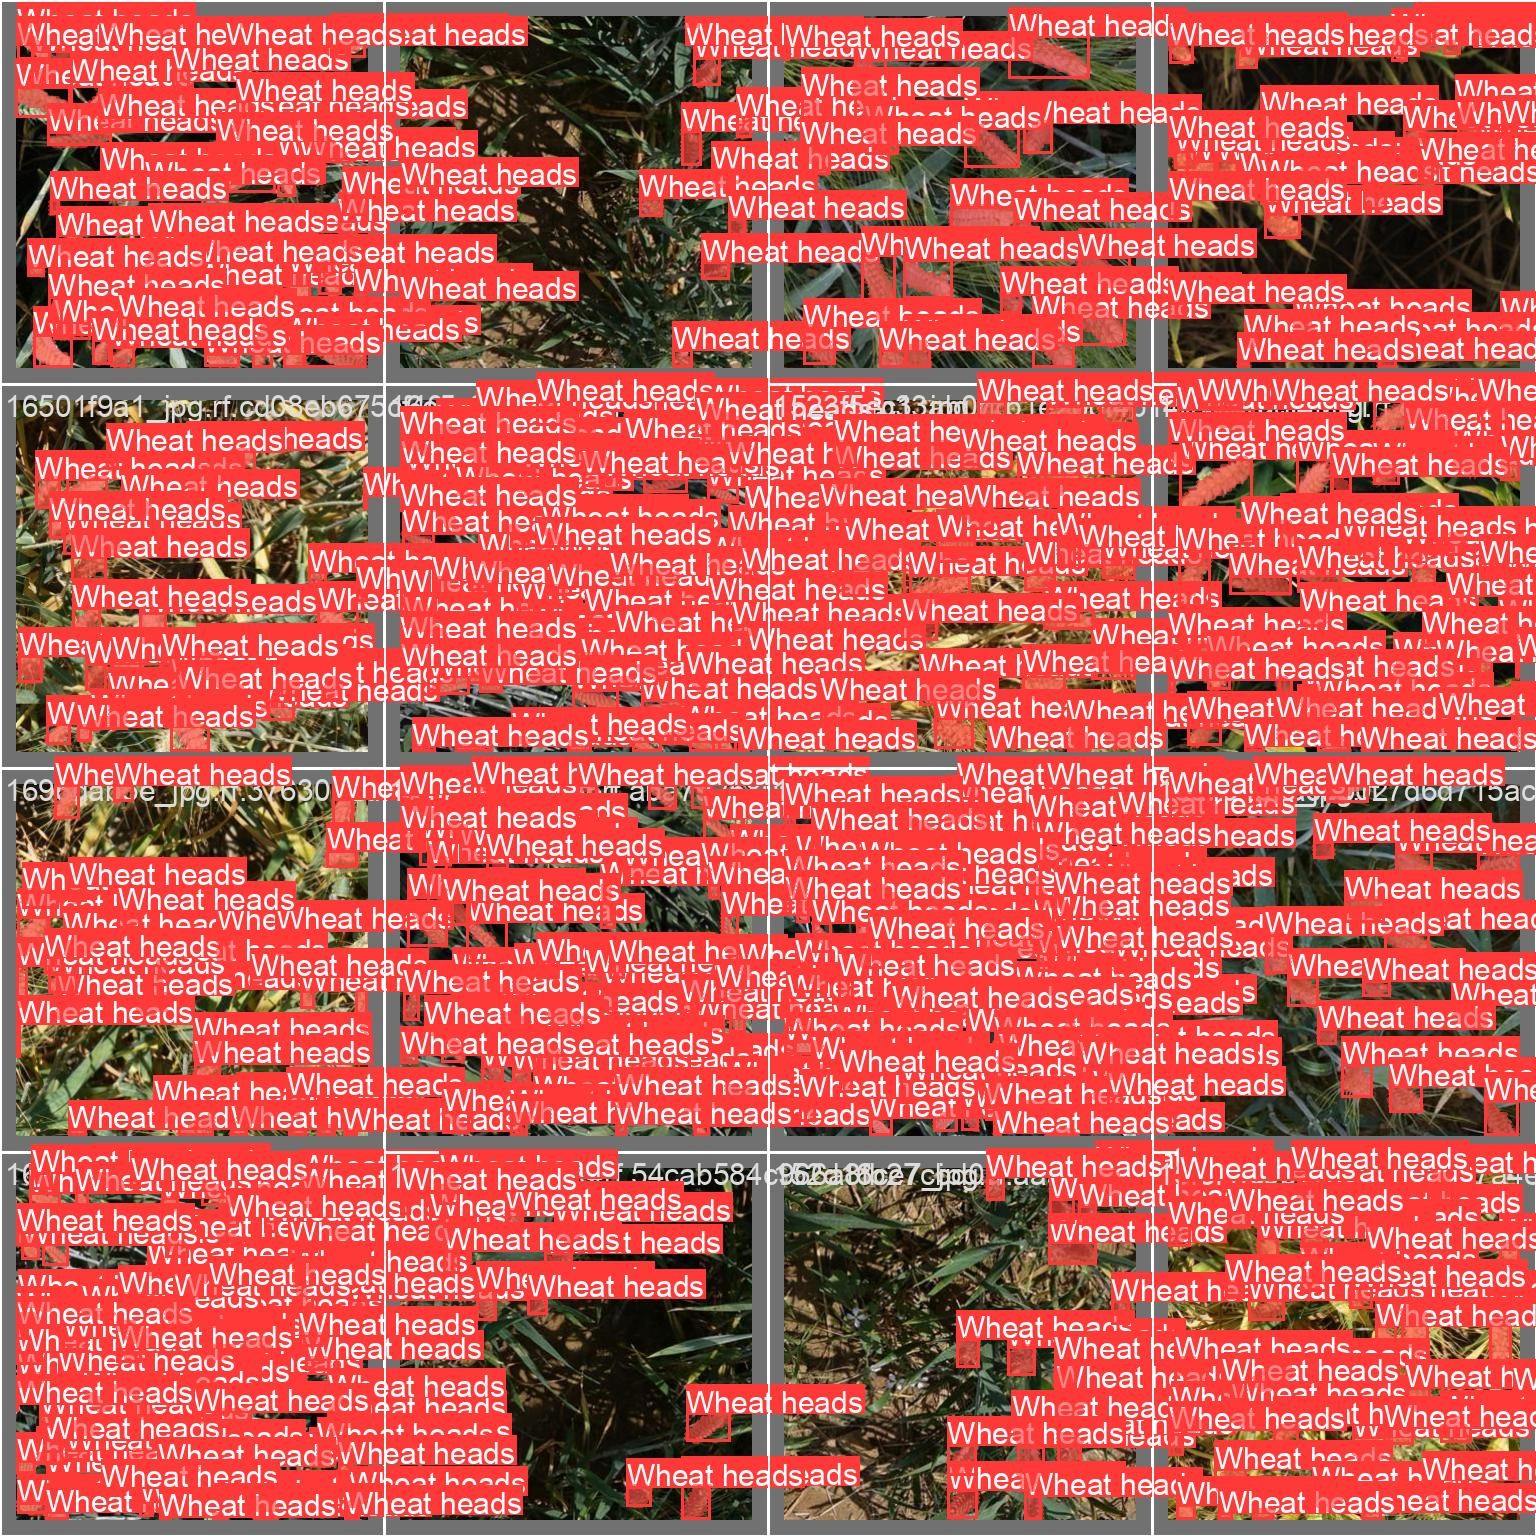

In [16]:
%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/val_batch2_labels.jpg', width=800)

/kaggle/working


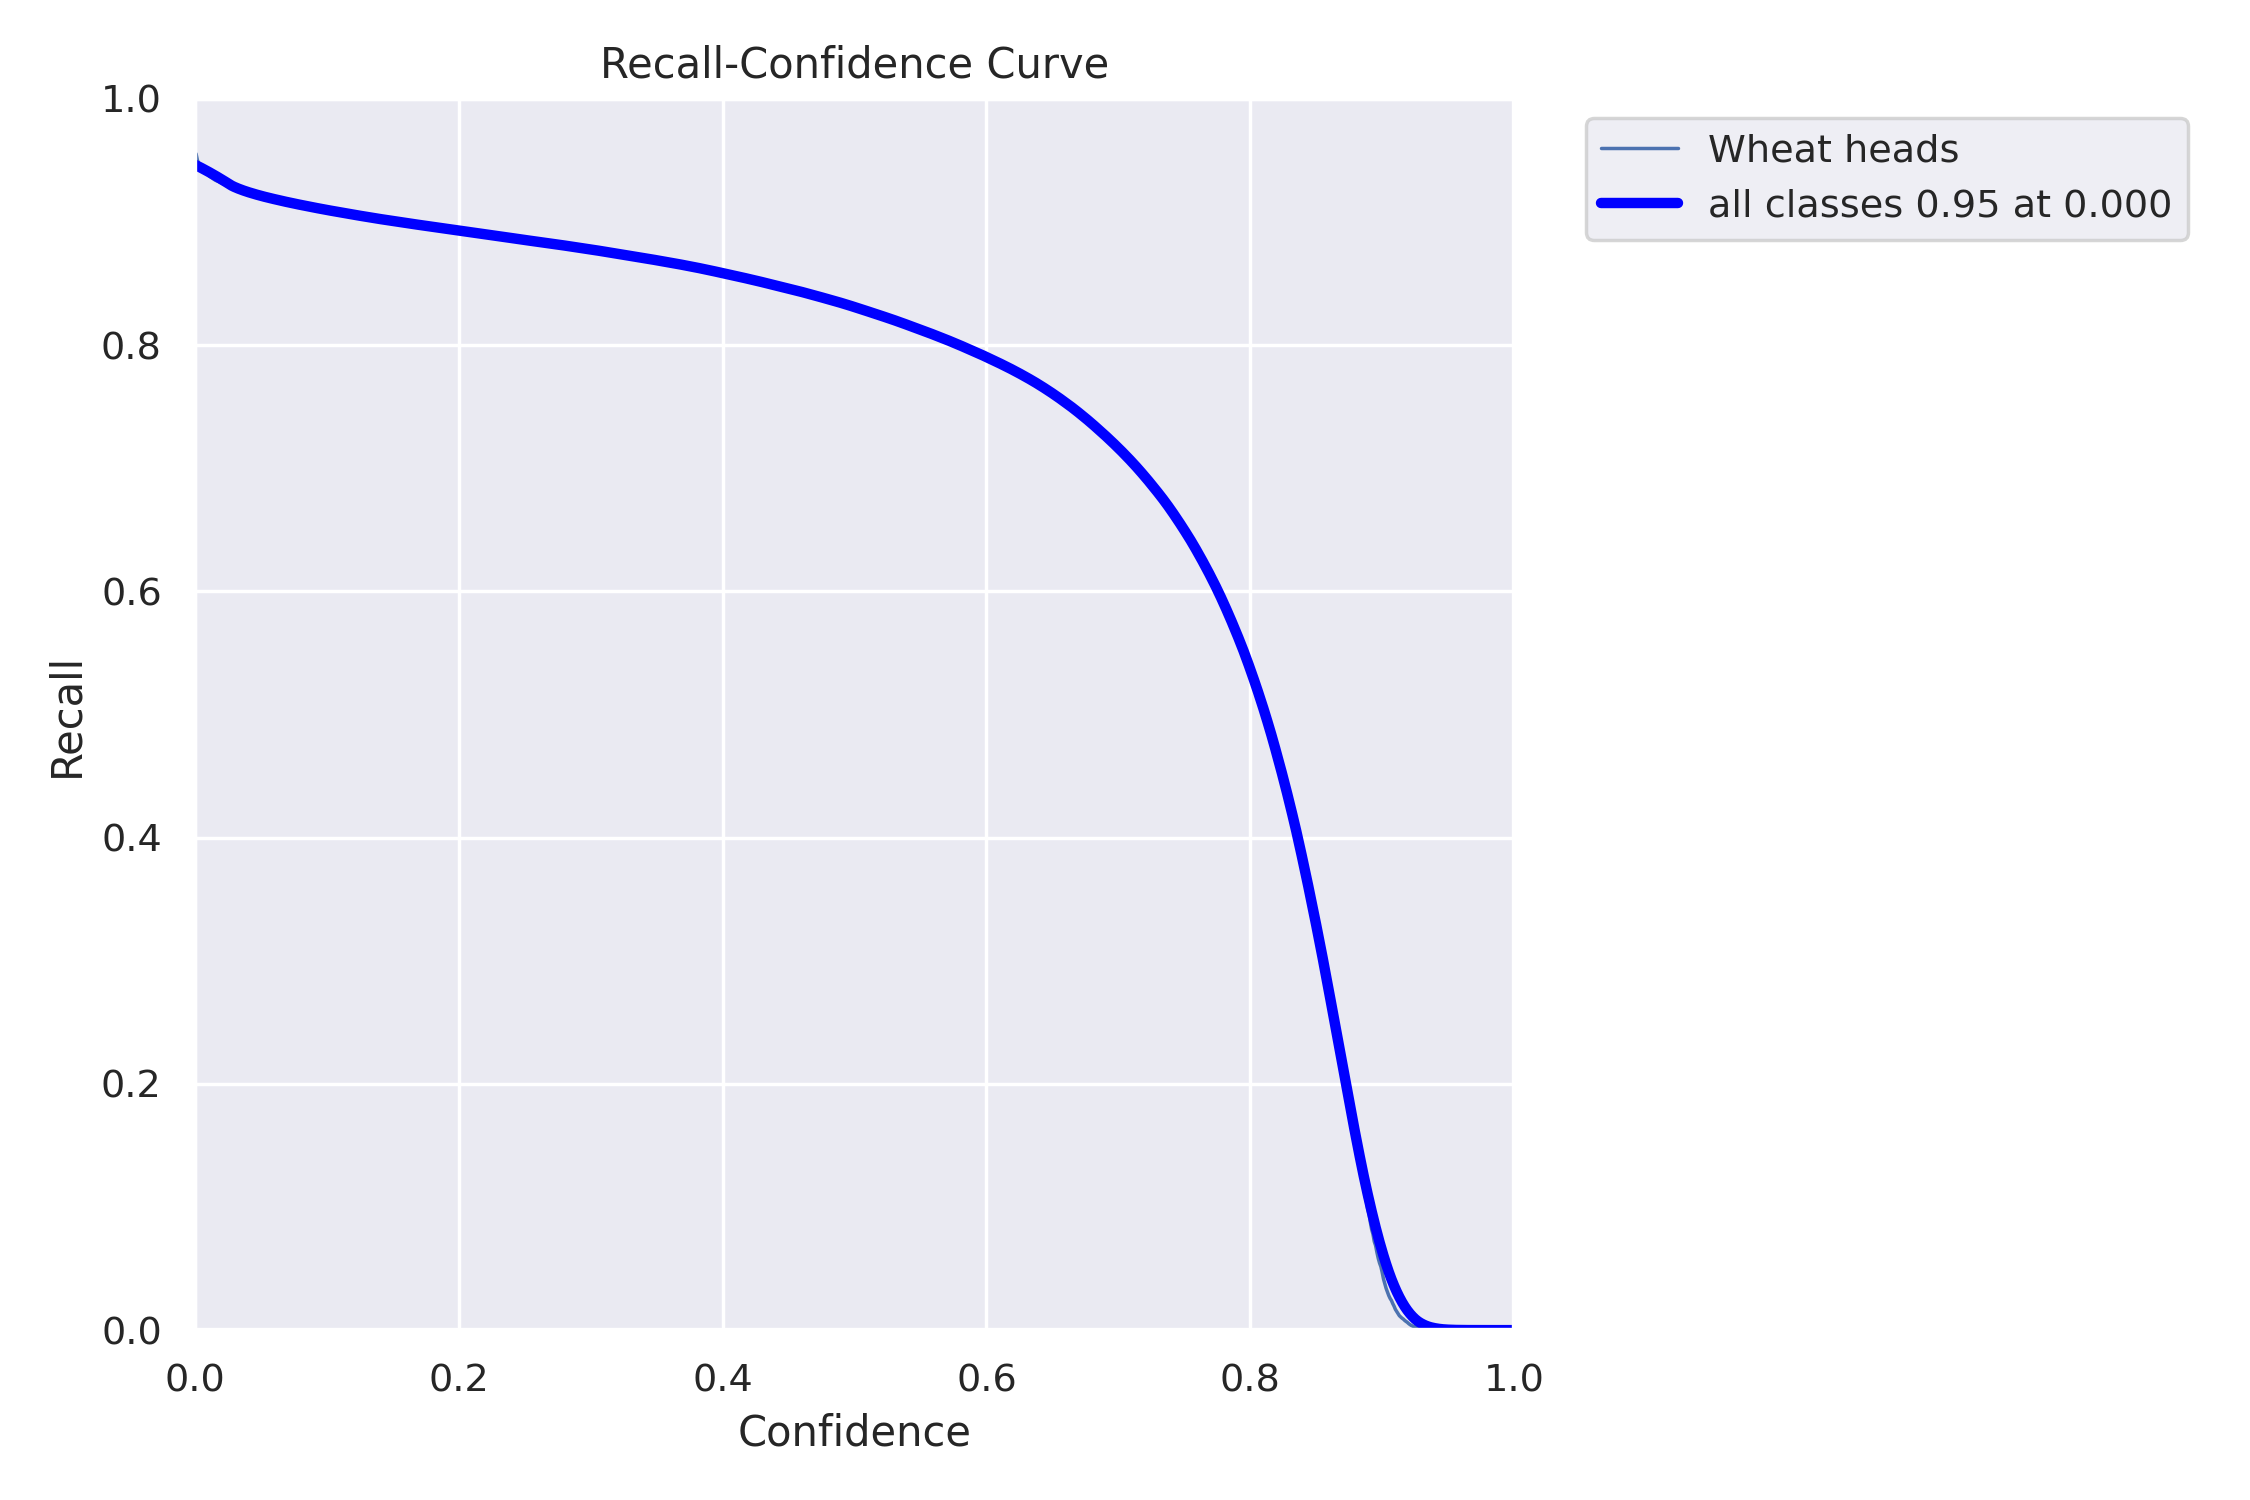

In [30]:

%cd {HOME}
Image(filename=f'{HOME}/runs/segment/train/MaskR_curve.png', width=800)

In [32]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train/weights/best.pt data={dataset.location}/data.yaml

/kaggle/working
2024-03-03 00:55:34.240828: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 00:55:34.240882: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 00:55:34.242367: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs
val: Scanning /kaggle/working/datasets/Wheat-2/valid/labels.cache... 1027 images
val: WARNING ⚠️ /kaggle/working/datasets/Wheat-2/valid/images/0e90d45c6_jpg.rf.50725e65f

In [36]:
%cd {HOME}

!yolo task=segment mode=predict model={HOME}/runs/segment/train/weights/best.pt conf=0.25 source={dataset.location}/valid/images save=true

/kaggle/working
2024-03-03 01:00:34.566827: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 01:00:34.566883: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 01:00:34.568324: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

image 1/1027 /kaggle/working/datasets/Wheat-2/valid/images/00b5c6764_jpg.rf.4be39c0282d13bc08af1ce9538af683a.jpg: 640x640 1 Wheat heads, 9.7ms
image 2/1027 /kaggle/work

In [25]:
pip install onnxruntime


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
from ultralytics import YOLO
import onnxruntime as ort
# Load the YOLOv8 model
model = YOLO('/kaggle/working/runs/segment/train/weights/best.pt')

# Export the model to ONNX format
model.export(format='onnx')  # creates 'yolov8n.onnx'

# Load the exported ONNX model
onnx_model = ort.InferenceSession('/kaggle/working/runs/segment/train/weights/best.onnx')


Ultralytics YOLOv8.0.28 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
YOLOv8s-seg summary (fused): 195 layers, 11779987 parameters, 0 gradients, 42.4 GFLOPs

PyTorch: starting from /kaggle/working/runs/segment/train/weights/best.pt with input shape (1, 3, 352, 352) and output shape (1, 37, 2541) (22.7 MB)

ONNX: starting export with onnx 1.15.0...
ONNX: export success ✅ 1.2s, saved as /kaggle/working/runs/segment/train/weights/best.onnx (45.0 MB)

Export complete (1.6s)
Results saved to /kaggle/working/runs/segment/train/weights
Predict:         yolo task=segment mode=predict model=/kaggle/working/runs/segment/train/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Validate:        yolo task=segment mode=val model=/kaggle/working/runs/segment/train/weights/best.onnx -WARNING ⚠️ not yet supported for YOLOv8 exported models
Visualize:       https://netron.app


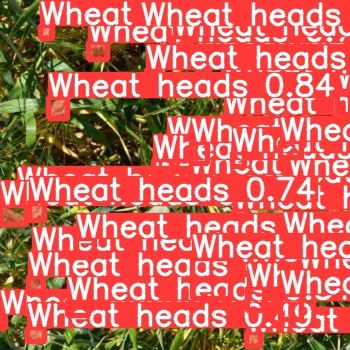

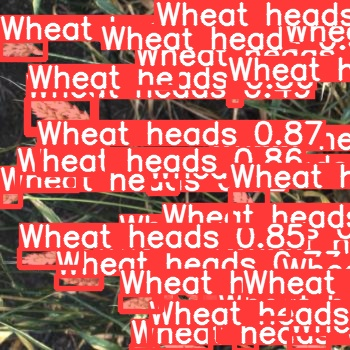

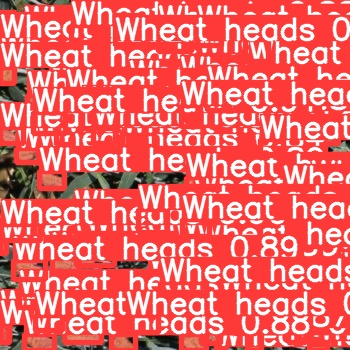

In [40]:
import glob
from IPython.display import Image, display
import os

# Define the path to the directory containing the predicted images
predict_dir = f"{HOME}/runs/segment/predict"

# Iterate over the images in the directory and display them
for image_path in glob.glob(os.path.join(predict_dir, '*.jpg'))[:3]:
    display(Image(filename=image_path, height=600))
    print("\n")


In [42]:
pip install ultralytics==8.0.196

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 631.1/631.1 kB 14.6 MB/s eta 0:00:0000:01
  Attempting uninstall: ultralytics
    Found existing installation: ultralytics 8.0.28
    Uninstalling ultralytics-8.0.28:
      Successfully uninstalled ultralytics-8.0.28
Note: you may need to restart the kernel to use updated packages.


In [43]:
project.version(dataset.version).deploy(model_type="yolov8-seg", model_path=f"{HOME}/runs/segment/train/")

Dependency ultralytics==8.0.196 is required but found version=8.0.28, to fix: `pip install ultralytics==8.0.196`


Would you like to continue with the wrong version of ultralytics? y/n:  y


View the status of your deployment at: https://app.roboflow.com/last-project/wheat-dqlhy/2
Share your model with the world at: https://universe.roboflow.com/last-project/wheat-dqlhy/model/2


In [48]:
import shutil

# Compress the folder into a zip file
shutil.make_archive("/kaggle/working/runs/segment", 'zip', "/kaggle/working/runs/segment")

# Rename the zip file to avoid overwriting
shutil.move("/kaggle/working/runs/segment.zip", "/kaggle/working/segment_result2.zip")


'/kaggle/working/segment_result2.zip'